In [16]:
import numpy as np

## Read Data

In [1]:
transactionFile = open('T10I4D100K.dat', 'r')
baskets = transactionFile.read().splitlines()
baskets = [set(map(int, basket.split(' ')[:-1])) for basket in baskets]
len(baskets)

100000

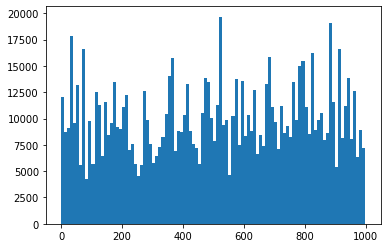

In [18]:
import matplotlib.pyplot as plt


baskets_arr = []
for sub_arr in baskets:
  for e in sub_arr:
    baskets_arr.append(e)

baskets_arr

plt.hist(baskets_arr, 100)
plt.show()

In [103]:
from itertools import combinations
import time

def getFreqSingle(transactions, threshold=0.01):
  freq_singletons = {}
  num_baskets = 0

  for basket in transactions:
    num_baskets += 1
    for item in basket:
      if frozenset([item]) in freq_singletons:
        freq_singletons[frozenset([item])] += 1
      else:
        freq_singletons[frozenset([item])] = 1

  freq_singletons = {key: value for key, value in freq_singletons.items() if value / num_baskets > threshold}
  return freq_singletons


continue_scan = True
scan_counter = 2
num_baskets = len(baskets)
threshold = 0.01

freqDict = {1:getFreqSingle(baskets, threshold)}

print('Number of frequent 1-ton:', len(freqDict[1]))

while continue_scan:
  tempFreqDict = {}
  prev_itemset = set(freqDict[scan_counter - 1].keys())

  for basket in baskets:
    Ct = list(set(itemset) for itemset in combinations(basket, scan_counter - 1) if {frozenset(itemset)}.issubset(prev_itemset))    
    Ct = set(frozenset().union(*list(itemset)) for itemset in combinations(Ct, scan_counter))
    for itemset in Ct:
      if itemset in tempFreqDict:
        tempFreqDict[itemset] += 1
      else:
        tempFreqDict[itemset] = 1
    
  tempFreqDict = {key: value for key, value in tempFreqDict.items() if value / num_baskets > threshold}
  print('Number of frequent ' + str(scan_counter) + '-ton:', len(tempFreqDict))
  if tempFreqDict:
    freqDict[scan_counter] = tempFreqDict
    scan_counter += 1
  else:
    continue_scan = False

Number of frequent 1-ton: 375
Number of frequent 2-ton: 9
Number of frequent 3-ton: 1
Number of frequent 4-ton: 0


In [98]:
from tqdm import tqdm
test = {}

for i in tqdm(range(len(baskets))):
  basket = baskets[i]
  for itemset in set(freqDict[1].keys()):
    all_items_present = True
    for item in itemset:
      if not set([item]).issubset(basket):
        all_items_present = False
        break
    if all_items_present:
      if frozenset([itemset]) in test:
        test[frozenset([itemset])] += 1
      else:
        test[frozenset([itemset])] = 0

errors = 0
for key in test:
  if test[key] / num_baskets < threshold:
    errors += 1
    print('ERROR:', test[key], test[key] / num_baskets)

print(len(freqDict[1].keys()))
print(len(test.keys()))
print('Errors:', errors)

100%|██████████| 100000/100000 [01:24<00:00, 1182.49it/s]

569
569
Errors: 0


In [99]:
from tqdm import tqdm
test = {}

for i in tqdm(range(len(baskets))):
  basket = baskets[i]
  for itemset in set(freqDict[2].keys()):
    all_items_present = True
    for item in itemset:
      if not set([item]).issubset(basket):
        all_items_present = False
        break
    if all_items_present:
      if frozenset([itemset]) in test:
        test[frozenset([itemset])] += 1
      else:
        test[frozenset([itemset])] = 0

errors = 0
for key in test:
  if test[key] / num_baskets < threshold:
    errors += 1
    print('ERROR:', test[key], test[key] / num_baskets)

print(len(freqDict[2].keys()))
print(len(test.keys()))
print('Errors:', errors)

100%|██████████| 100000/100000 [00:48<00:00, 2042.77it/s]

339
339
Errors: 0


In [100]:
from tqdm import tqdm
test = {}

for i in tqdm(range(len(baskets))):
  basket = baskets[i]
  for itemset in set(freqDict[3].keys()):
    all_items_present = True
    for item in itemset:
      if not set([item]).issubset(basket):
        all_items_present = False
        break
    if all_items_present:
      if frozenset([itemset]) in test:
        test[frozenset([itemset])] += 1
      else:
        test[frozenset([itemset])] = 0

errors = 0
for key in test:
  if test[key] / num_baskets < threshold:
    errors += 1
    # print('ERROR:', test[key], test[key] / num_baskets)

print(len(freqDict[3].keys()))
print(len(test.keys()))
print('Errors:', errors)

100%|██████████| 100000/100000 [00:22<00:00, 4443.86it/s]

160
160
Errors: 0


In [101]:
from tqdm import tqdm
test = {}

for i in tqdm(range(len(baskets))):
  basket = baskets[i]
  for itemset in set(freqDict[4].keys()):
    all_items_present = True
    for item in itemset:
      if not set([item]).issubset(basket):
        all_items_present = False
        break
    if all_items_present:
      if frozenset([itemset]) in test:
        test[frozenset([itemset])] += 1
      else:
        test[frozenset([itemset])] = 0

errors = 0
for key in test:
  if test[key] / num_baskets < threshold:
    errors += 1
    # print('ERROR:', test[key], test[key] / num_baskets)

print(len(freqDict[4].keys()))
print(len(test.keys()))
print('Errors:', errors)

100%|██████████| 100000/100000 [00:07<00:00, 12811.87it/s]

51
51
Errors: 0


In [102]:
from tqdm import tqdm
test = {}

for i in tqdm(range(len(baskets))):
  basket = baskets[i]
  for itemset in set(freqDict[5].keys()):
    all_items_present = True
    for item in itemset:
      if not set([item]).issubset(basket):
        all_items_present = False
        break
    if all_items_present:
      if frozenset([itemset]) in test:
        test[frozenset([itemset])] += 1
      else:
        test[frozenset([itemset])] = 0

errors = 0
for key in test:
  if test[key] / num_baskets < threshold:
    errors += 1
    # print('ERROR:', test[key], test[key] / num_baskets)

print(len(freqDict[5].keys()))
print(len(test.keys()))
print('Errors:', errors)

100%|██████████| 100000/100000 [00:01<00:00, 66143.09it/s]

9
9
Errors: 0
